In [1]:
import keras.metrics
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten
from keras.utils import image_dataset_from_directory
import pandas as pd

import os, shutil
from PIL import Image
import random

import pickle

from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

print (len(tf.config.experimental.list_physical_devices('GPU')))

1


In [2]:
base_dir = "../dataset/"
img_folder = os.path.join(base_dir, 'segment10/')
train_imgs = os.path.join(img_folder, 'train/')
test_imgs = os.path.join(img_folder, 'test/')
driver_imgs_list = pd.read_csv(os.path.join('list.csv'))

In [3]:
classes = ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

class_def = {'c0': 'safe driving',
'c1': 'texting - right',
'c2': 'talking on the phone - right',
'c3': 'texting - left',
'c4': 'talking on the phone - left',
'c5': 'operating the radio',
'c6': 'drinking',
'c7': 'reaching behind',
'c8': 'hair and makeup',
'c9': 'talking to passenger'}

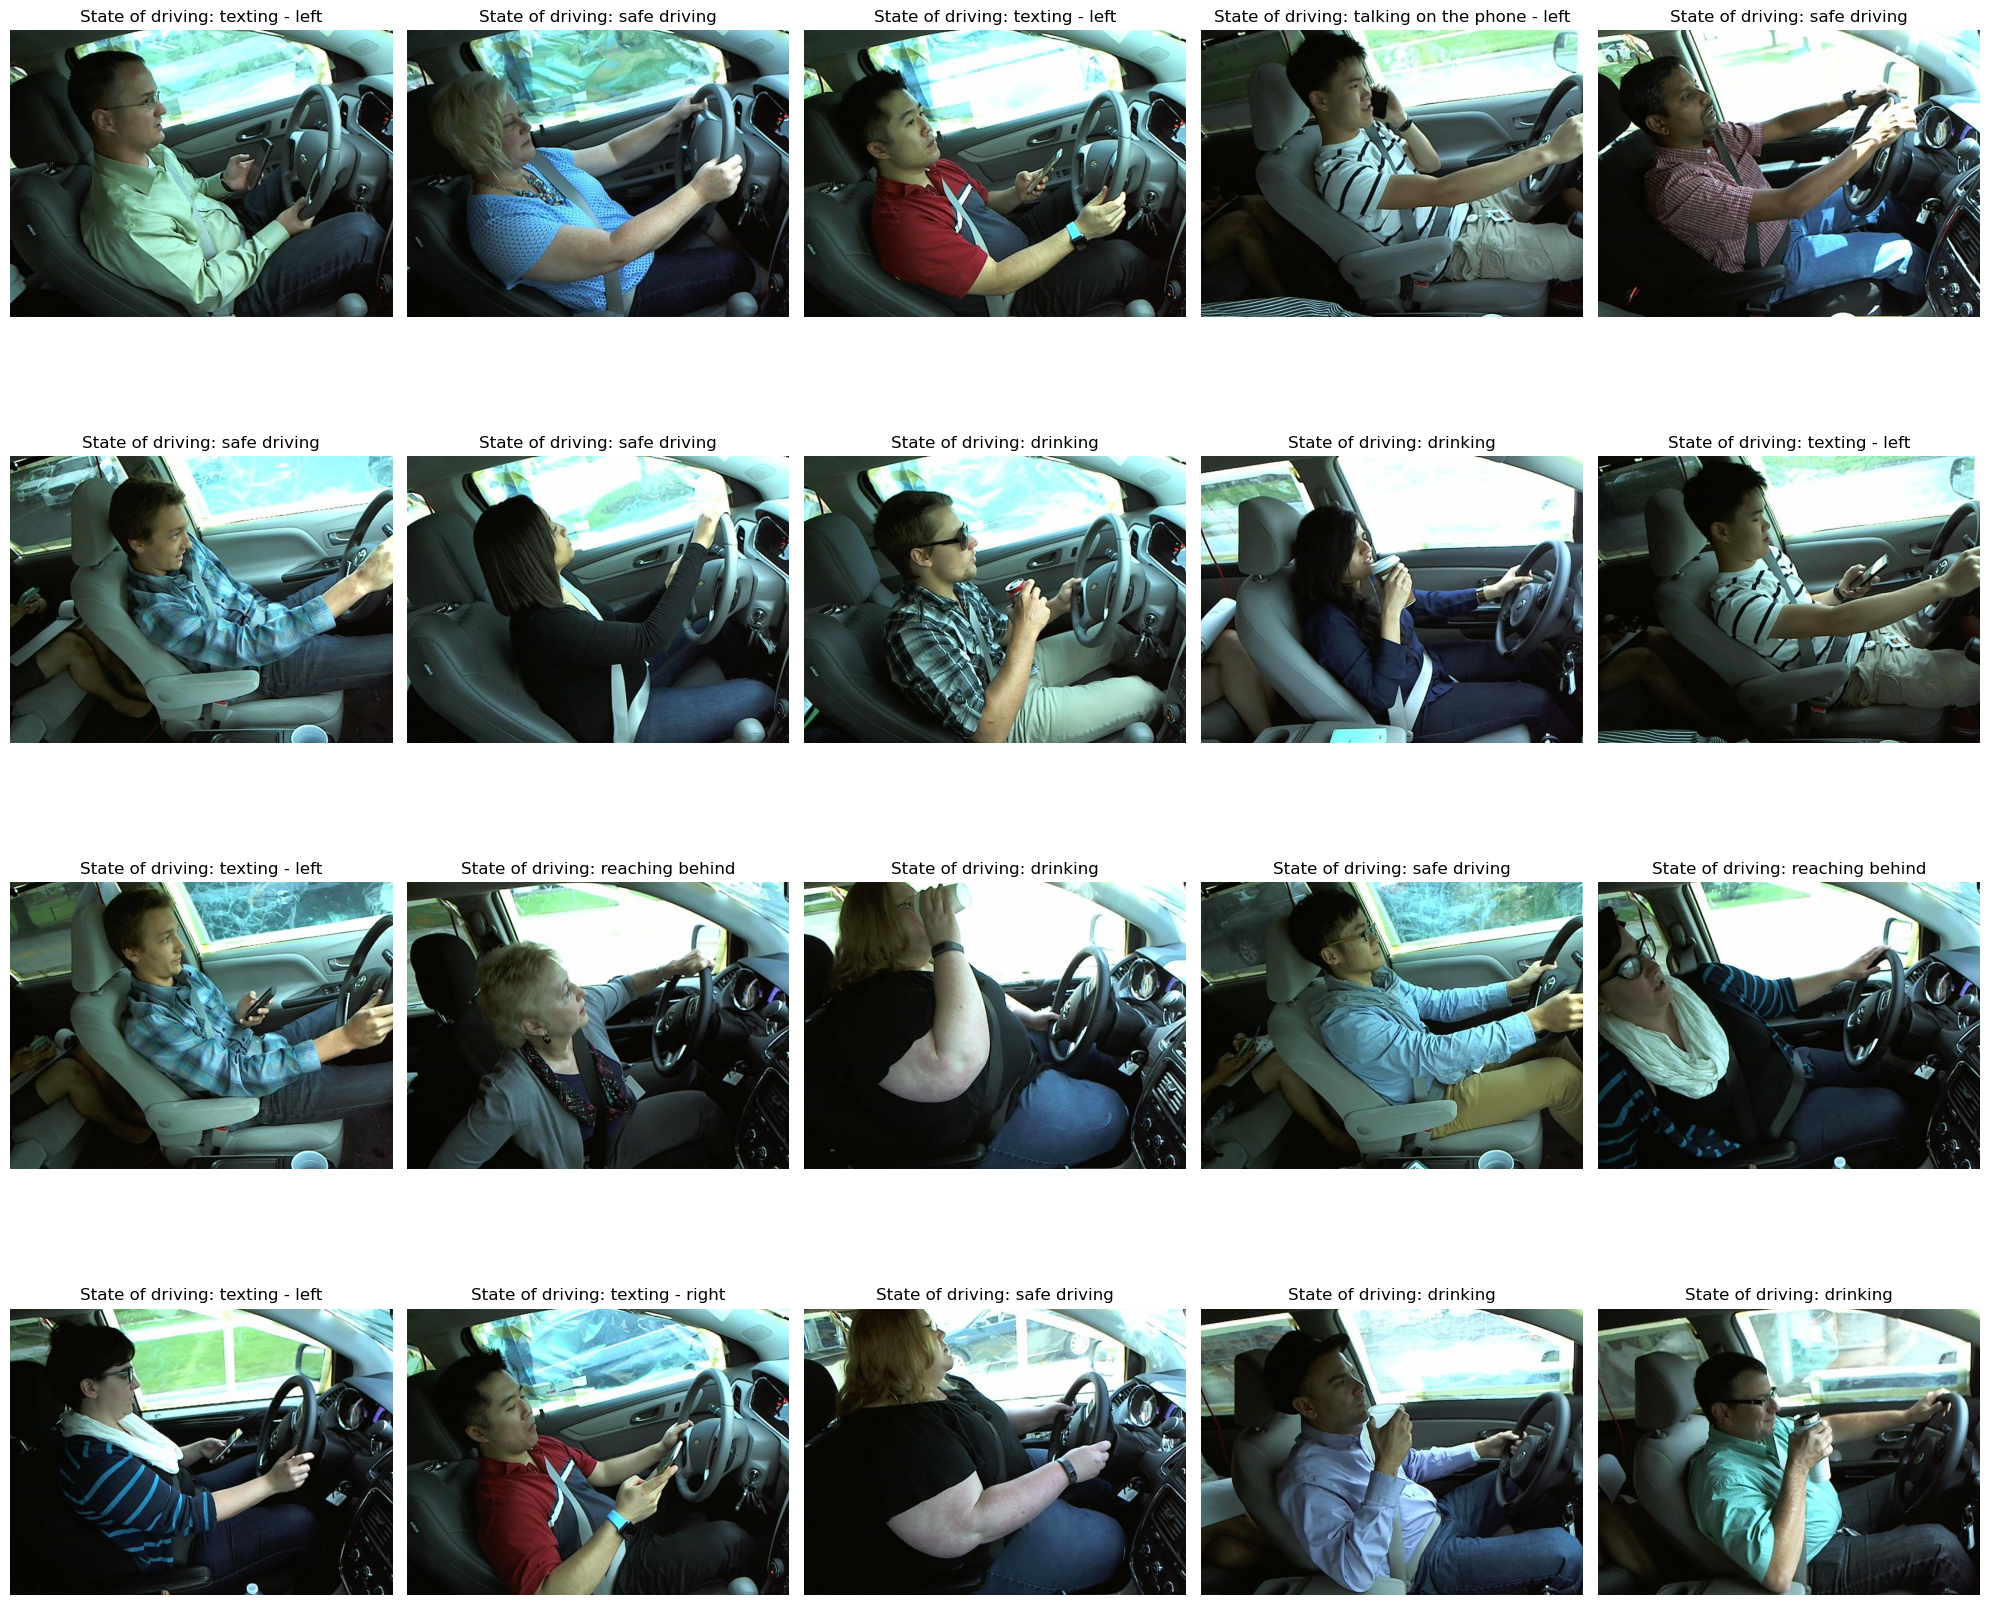

In [5]:
fig = plt.figure(figsize=(20, 18))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    pic_idx = random.randint(0, driver_imgs_list.shape[0])
    im = Image.open("dataset/imgs/train/"+
                    str(driver_imgs_list.loc[pic_idx, 'classname']) +'/'
                    +str(driver_imgs_list.loc[pic_idx, 'img' ]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(im)
    plt.title('State of driving: ' + class_def[(driver_imgs_list.loc[pic_idx, 'classname'])])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [4]:
image_size = (224, 224)
validation_split= 0.20
batch_size = 32
train_dir = "dataset/segment10/train/"

train_set = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=0.20,
                                                             subset='training')
val_set = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                             labels = 'inferred',
                                                             label_mode='categorical',
                                                             image_size=image_size,
                                                             batch_size=batch_size,
                                                             seed=1,
                                                             shuffle=True,
                                                             validation_split=0.20,
                                                             subset='validation')

Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.


In [5]:
def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_set = train_set.map(normalize)
val_set = val_set.map(normalize)

In [8]:
model_6 = Sequential ([
    Conv2D(128, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [9]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 32)       0

In [10]:
model_6.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [11]:
history_6 = model_6.fit(
train_set,
steps_per_epoch=len(train_set),
epochs=5,
validation_data=val_set,
validation_steps=len(val_set))

Epoch 1/5
250/250 [==============================] - 36s 119ms/step - loss: 1.1815 - accuracy: 0.5865 - val_loss: 0.2617 - val_accuracy: 0.9270
Epoch 2/5
250/250 [==============================] - 29s 117ms/step - loss: 0.1148 - accuracy: 0.9686 - val_loss: 0.1151 - val_accuracy: 0.9670
Epoch 3/5
250/250 [==============================] - 30s 118ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0976 - val_accuracy: 0.9745
Epoch 4/5
250/250 [==============================] - 29s 118ms/step - loss: 0.0317 - accuracy: 0.9889 - val_loss: 0.0954 - val_accuracy: 0.9760
Epoch 5/5
250/250 [==============================] - 29s 117ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.1824 - val_accuracy: 0.9605


In [12]:
model_12 = Sequential ([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
model_12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [14]:
model_12.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [15]:
history = model_12.fit(
train_set,
steps_per_epoch=len(train_set),
epochs=10,
validation_data=val_set,
validation_steps=len(val_set))

Epoch 1/10
250/250 [==============================] - 16s 56ms/step - loss: 1.8747 - accuracy: 0.2770 - val_loss: 0.9170 - val_accuracy: 0.6645
Epoch 2/10
250/250 [==============================] - 14s 55ms/step - loss: 0.5565 - accuracy: 0.8058 - val_loss: 0.3583 - val_accuracy: 0.8745
Epoch 3/10
250/250 [==============================] - 14s 54ms/step - loss: 0.2382 - accuracy: 0.9289 - val_loss: 0.1921 - val_accuracy: 0.9450
Epoch 4/10
250/250 [==============================] - 14s 54ms/step - loss: 0.1312 - accuracy: 0.9585 - val_loss: 0.1959 - val_accuracy: 0.9450
Epoch 5/10
250/250 [==============================] - 14s 55ms/step - loss: 0.0906 - accuracy: 0.9728 - val_loss: 0.2220 - val_accuracy: 0.9435
Epoch 6/10
250/250 [==============================] - 14s 54ms/step - loss: 0.0614 - accuracy: 0.9816 - val_loss: 0.1436 - val_accuracy: 0.9610
Epoch 7/10
250/250 [==============================] - 14s 54ms/step - loss: 0.0747 - accuracy: 0.9784 - val_loss: 0.1380 - val_accuracy:

In [16]:
model_12.save_weights('CNN Distracted driver weights.h5', overwrite=True)

In [17]:
pickle.dump(model_12, open("model_12.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://d5246cd3-a5f1-4843-9b7a-84660b69a4a4/assets


INFO:tensorflow:Assets written to: ram://d5246cd3-a5f1-4843-9b7a-84660b69a4a4/assets


In [18]:
model_13 = Sequential ([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [19]:
model_13.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 26, 26, 128)     

In [20]:
model_13.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [10]:
history_2 = model_13.fit(
train_set,
steps_per_epoch=len(train_set),
epochs=10,
validation_data=val_set,
validation_steps=len(val_set))

Epoch 1/10
561/561 [==============================] - 38s 56ms/step - loss: 0.7232 - accuracy: 0.7564 - val_loss: 0.1418 - val_accuracy: 0.9570
Epoch 2/10
561/561 [==============================] - 31s 55ms/step - loss: 0.0812 - accuracy: 0.9785 - val_loss: 0.0584 - val_accuracy: 0.9860
Epoch 3/10
561/561 [==============================] - 31s 55ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0567 - val_accuracy: 0.9862
Epoch 4/10
561/561 [==============================] - 31s 54ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0692 - val_accuracy: 0.9833
Epoch 5/10
561/561 [==============================] - 30s 54ms/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0744 - val_accuracy: 0.9806
Epoch 6/10
561/561 [==============================] - 30s 54ms/step - loss: 0.0226 - accuracy: 0.9932 - val_loss: 0.0467 - val_accuracy: 0.9900
Epoch 7/10
561/561 [==============================] - 30s 53ms/step - loss: 0.0217 - accuracy: 0.9939 - val_loss: 0.0575 - val_accuracy:

In [6]:
model_15 = Sequential ([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [7]:
model_15.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [9]:
history_4 = model_15.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=20,
    validation_data=val_set,
    validation_steps=len(val_set),
    callbacks=[callback])

Epoch 1/20
561/561 [==============================] - 38s 60ms/step - loss: 0.7110 - accuracy: 0.7632 - val_loss: 0.2047 - val_accuracy: 0.9405
Epoch 2/20
561/561 [==============================] - 33s 58ms/step - loss: 0.0758 - accuracy: 0.9789 - val_loss: 0.0785 - val_accuracy: 0.9779
Epoch 3/20
561/561 [==============================] - 33s 59ms/step - loss: 0.0471 - accuracy: 0.9849 - val_loss: 0.0508 - val_accuracy: 0.9900
Epoch 4/20
561/561 [==============================] - 32s 58ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0772 - val_accuracy: 0.9822
Epoch 5/20
561/561 [==============================] - 32s 57ms/step - loss: 0.0223 - accuracy: 0.9939 - val_loss: 0.0633 - val_accuracy: 0.9844
Epoch 6/20
561/561 [==============================] - 32s 56ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0559 - val_accuracy: 0.9862


In [21]:
model_16 = Sequential ([
    Conv2D(32, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(512, 3, activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [22]:
model_16.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8)

In [24]:
history_5 = model_16.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=50,
    validation_data=val_set,
    validation_steps=len(val_set),
    callbacks=[callback])

Epoch 1/50
250/250 [==============================] - 15s 56ms/step - loss: 1.4685 - accuracy: 0.4744 - val_loss: 0.5256 - val_accuracy: 0.8580
Epoch 2/50
250/250 [==============================] - 14s 57ms/step - loss: 0.2950 - accuracy: 0.9156 - val_loss: 0.1886 - val_accuracy: 0.9530
Epoch 3/50
250/250 [==============================] - 15s 59ms/step - loss: 0.1256 - accuracy: 0.9620 - val_loss: 0.1693 - val_accuracy: 0.9580
Epoch 4/50
250/250 [==============================] - 15s 60ms/step - loss: 0.0758 - accuracy: 0.9781 - val_loss: 0.1268 - val_accuracy: 0.9760
Epoch 5/50
250/250 [==============================] - 15s 60ms/step - loss: 0.0390 - accuracy: 0.9884 - val_loss: 0.1779 - val_accuracy: 0.9620
Epoch 6/50
250/250 [==============================] - 15s 59ms/step - loss: 0.0322 - accuracy: 0.9900 - val_loss: 0.1420 - val_accuracy: 0.9735
Epoch 7/50
250/250 [==============================] - 15s 60ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.1520 - val_accuracy:

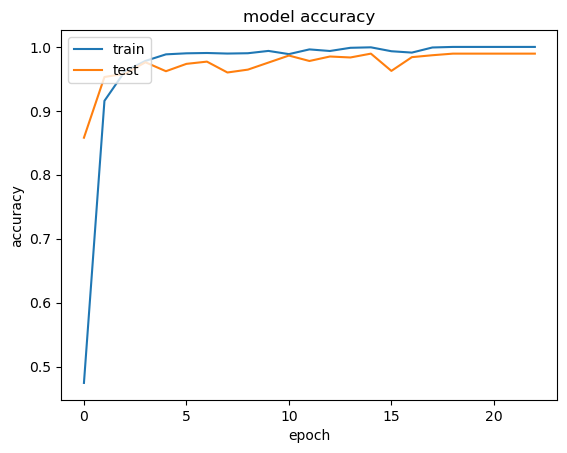

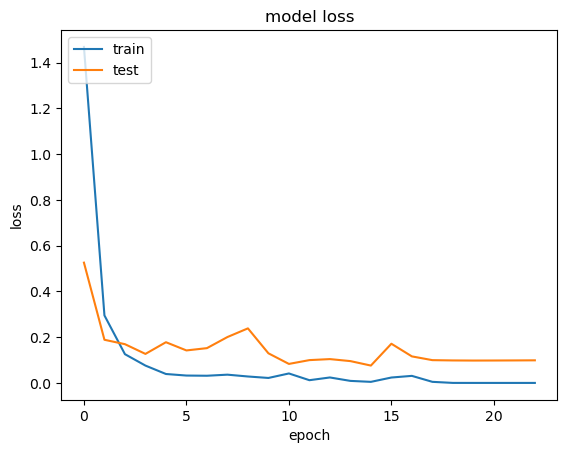

In [32]:
# summarize history for accuracy
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
model_16.save_weights('CNN ES DDDS weights.h5', overwrite=True)

In [26]:
pickle.dump(model_16, open("model_16.pkl", "wb"))

INFO:tensorflow:Assets written to: ram://91b3402b-1f8e-4235-8093-68008f79a631/assets


INFO:tensorflow:Assets written to: ram://91b3402b-1f8e-4235-8093-68008f79a631/assets


In [27]:
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [28]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

# Creating the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to classes
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Prediction Label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Let's plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
              size=text_size)


In [13]:
classes

['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9']

In [14]:
class_def

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}

In [15]:
class_names = ["safe driving", "texting-right", "talking on phone-right", "texting-left", "talking on phone-left", "operating the radio", "drinking", "reaching behind", "hair/makeup", "talking to passenger"]

In [16]:
class_names

['safe driving',
 'texting-right',
 'talking on phone-right',
 'texting-left',
 'talking on phone-left',
 'operating the radio',
 'drinking',
 'reaching behind',
 'hair/makeup',
 'talking to passenger']

In [20]:
y_probs = model_13.predict(val_set)

141/141 [==============================] - 3s 19ms/step


In [25]:
y_probs

array([[9.1108293e-10, 3.8112189e-09, 1.0000000e+00, ..., 6.4807458e-11,
        1.8237697e-09, 3.1627422e-08],
       [9.9999475e-01, 4.9414925e-09, 6.9945411e-11, ..., 5.5779496e-11,
        7.3584883e-10, 2.3425462e-08],
       [2.6512996e-06, 3.1405611e-10, 1.4533508e-08, ..., 2.0007836e-13,
        1.5662722e-09, 1.9377410e-08],
       ...,
       [3.6125602e-05, 4.3628847e-09, 3.3547598e-04, ..., 7.4282012e-09,
        9.9957782e-01, 3.2934669e-05],
       [6.2728907e-09, 1.7539216e-12, 9.9999917e-01, ..., 1.0531811e-13,
        8.7093287e-07, 1.5030820e-11],
       [1.5273664e-13, 8.1112590e-17, 3.1534497e-18, ..., 3.5802910e-15,
        1.9506708e-14, 1.7497805e-11]], dtype=float32)

In [21]:
y_preds = y_probs.argmax(axis=1)

In [22]:
y_preds

array([2, 0, 5, ..., 8, 2, 4], dtype=int64)

In [6]:
base_model  = tf.keras.applications.resnet.ResNet50(include_top = False,
                                                  weights = 'imagenet',
                                                  input_shape = (224, 224, 3))
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [7]:
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.5)(x)

output =tf.keras.layers.Dense(units = len(classes),activation = tf.nn.softmax)(x)
model = tf.keras.models.Model(inputs=base_model.inputs, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [8]:
num_epochs = 50
def lr_schedule(epoch,lr):
    # Learning Rate Schedule

    lr = lr
    total_epochs = num_epochs

    check_1 = int(total_epochs * 0.9)
    check_2 = int(total_epochs * 0.8)
    check_3 = int(total_epochs * 0.6)
    check_4 = int(total_epochs * 0.4)

    if epoch > check_1:
        lr *= 1e-4
    elif epoch > check_2:
        lr *= 1e-3
    elif epoch > check_3:
        lr *= 1e-2
    elif epoch > check_4:
        lr *= 1e-1

    print("[+] Current Lr rate : {} ".format(lr))
    return lr
lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

In [9]:
history_res = model.fit(
    train_set,
    steps_per_epoch=len(train_set),
    epochs=25,
    validation_data=val_set,
    validation_steps=len(val_set),
    callbacks=[lr_callback])


[+] Current Lr rate : 9.999999747378752e-05 
Epoch 1/25
250/250 [==============================] - 69s 235ms/step - loss: 0.5022 - accuracy: 0.8886 - val_loss: 4.0494 - val_accuracy: 0.0945 - lr: 1.0000e-04
[+] Current Lr rate : 9.999999747378752e-05 
Epoch 2/25
250/250 [==============================] - 58s 234ms/step - loss: 0.0459 - accuracy: 0.9869 - val_loss: 2.9716 - val_accuracy: 0.1810 - lr: 1.0000e-04
[+] Current Lr rate : 9.999999747378752e-05 
Epoch 3/25
250/250 [==============================] - 58s 233ms/step - loss: 0.0361 - accuracy: 0.9898 - val_loss: 1.8613 - val_accuracy: 0.5675 - lr: 1.0000e-04
[+] Current Lr rate : 9.999999747378752e-05 
Epoch 4/25
250/250 [==============================] - 59s 234ms/step - loss: 0.0207 - accuracy: 0.9956 - val_loss: 0.1056 - val_accuracy: 0.9735 - lr: 1.0000e-04
[+] Current Lr rate : 9.999999747378752e-05 
Epoch 5/25
250/250 [==============================] - 58s 234ms/step - loss: 0.0651 - accuracy: 0.9859 - val_loss: 0.1296 - val

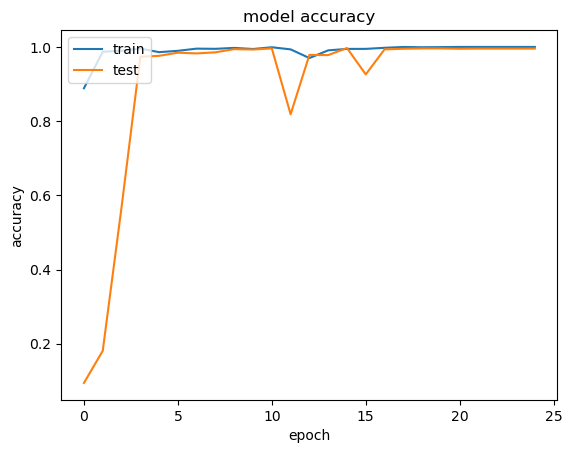

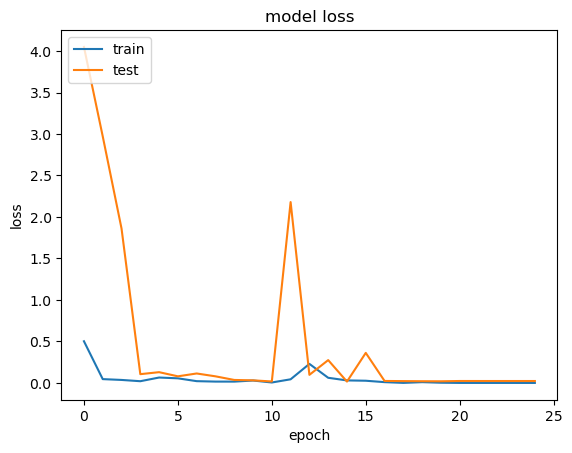

In [10]:
# summarize history for accuracy
plt.plot(history_res.history['accuracy'])
plt.plot(history_res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()